# Page View Time Series Visualizer

#### Define the imports

In [2]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

#### Read the data from the .csv file

In [3]:
df = pd.read_csv("fcc-forum-pageviews.csv")

#### Set the index to date

#### Clean data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [4]:
df = df.loc[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]

## Create a line plot of the data  

In [5]:

def draw_line_plot():
    
    #Copy the dataframe to edit data
    df_line = df.copy()
    #Convert datafram date and year to datetime
    df_line['date'] = pd.to_datetime(df_line['date'])
    df_line['year'] = df_line['date'].dt.year
    df_line['month'] = df_line['date'].dt.month
    
    # Set up the matplotlib figure
    fig, ax = plt.subplots(figsize=(20,7))
    ax.plot('date', 'value', data=df_line, color='red')
    
    #Set ticks on x axis
    fmt_half_year = mdates.MonthLocator(interval=6)
    ax.xaxis.set_major_locator(fmt_half_year)
    
    #Set the titel
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019',pad=20, fontsize='x-large')
    
    #Set labels
    ax.set_xlabel("Date",labelpad=10.0)
    ax.set_ylabel("Page Views",labelpad=10.0)
    
    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

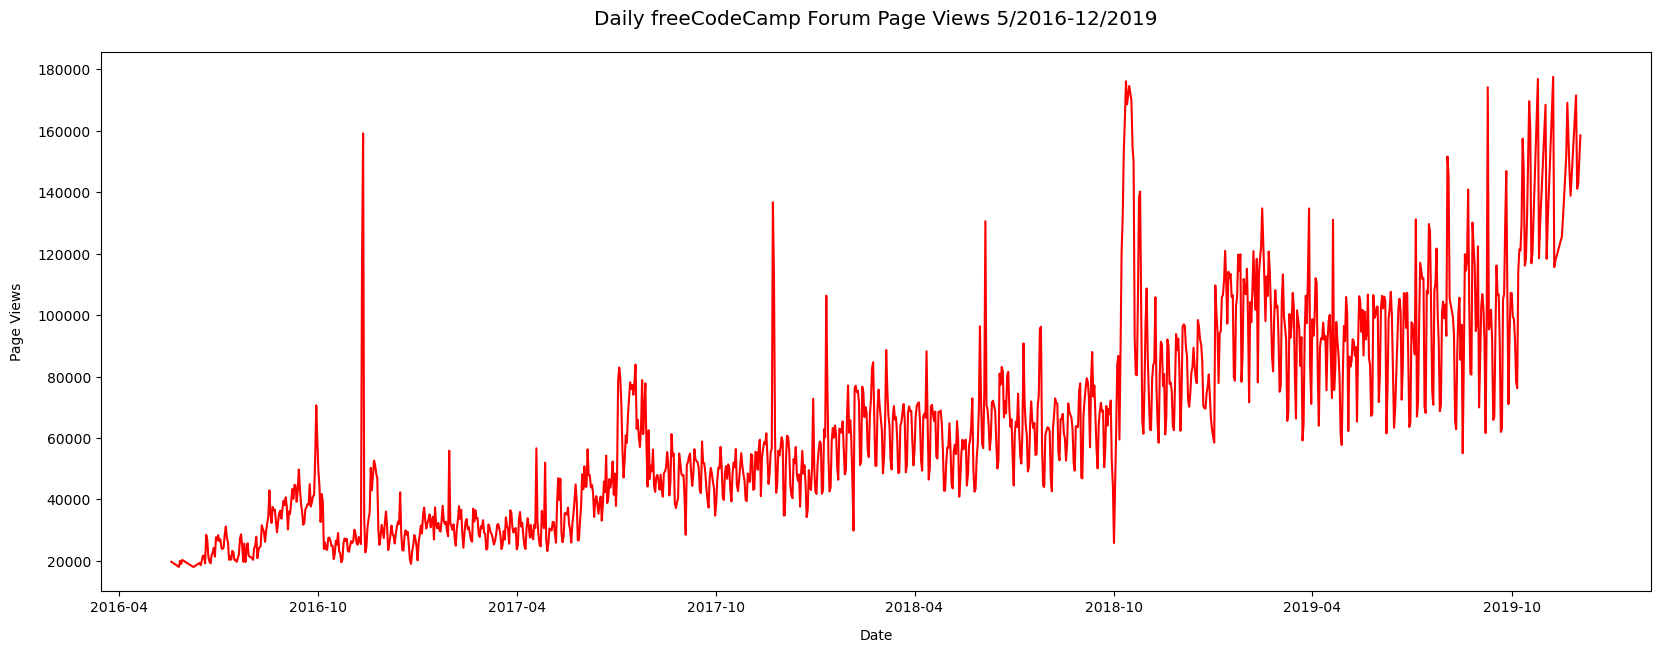

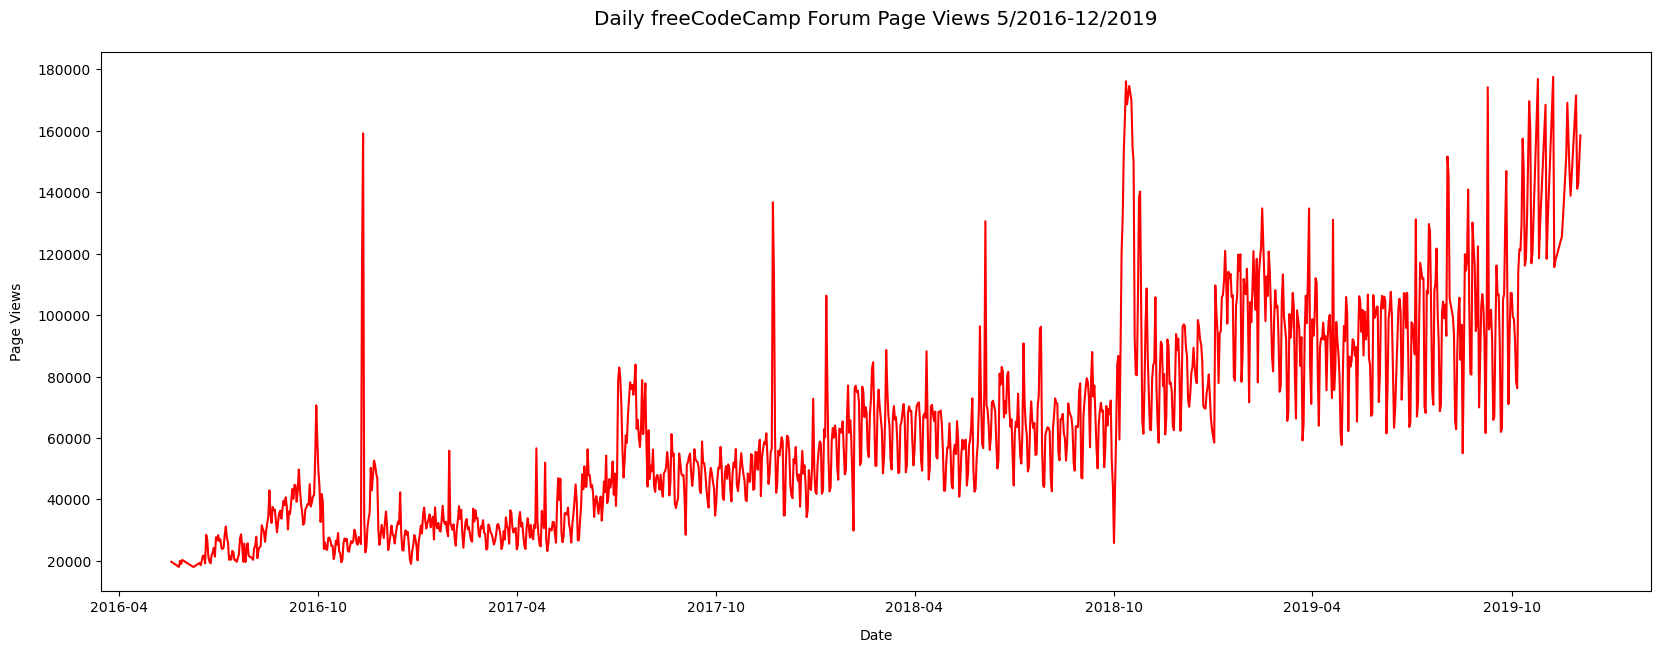

In [6]:
draw_line_plot()

#### Copy the date, clean the data, then create a bar plot
* Note In Python 3.10 there is a bug to where I cannot use sb for the bar plot. I was stuck using pandas

In [11]:
def draw_bar_plot():
    
    # Prepare data
    df_bar = df.copy()
    
    # Convert date to datetime and extract year and month
    df_bar['date'] = pd.to_datetime(df_bar['date'])
    df_bar['Year'] = df_bar['date'].dt.year
    df_bar['Month'] = df_bar['date'].dt.month

    # Group by Year and Month and compute mean
    df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean().unstack()
    
    # Draw bar plot
    fig = df_bar.plot(kind='bar', figsize=(15,10)).figure
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
                   'August', 'September', 'October', 'November', 'December']
    
    plt.title('Monthly Average Page Views by Year')
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    lg = plt.legend(title='Months', fontsize=15, labels=month_names)
    title = lg.get_title()
    title.set_fontsize(15)

    # Save and return
    fig.savefig('bar_plot.png')
    return fig

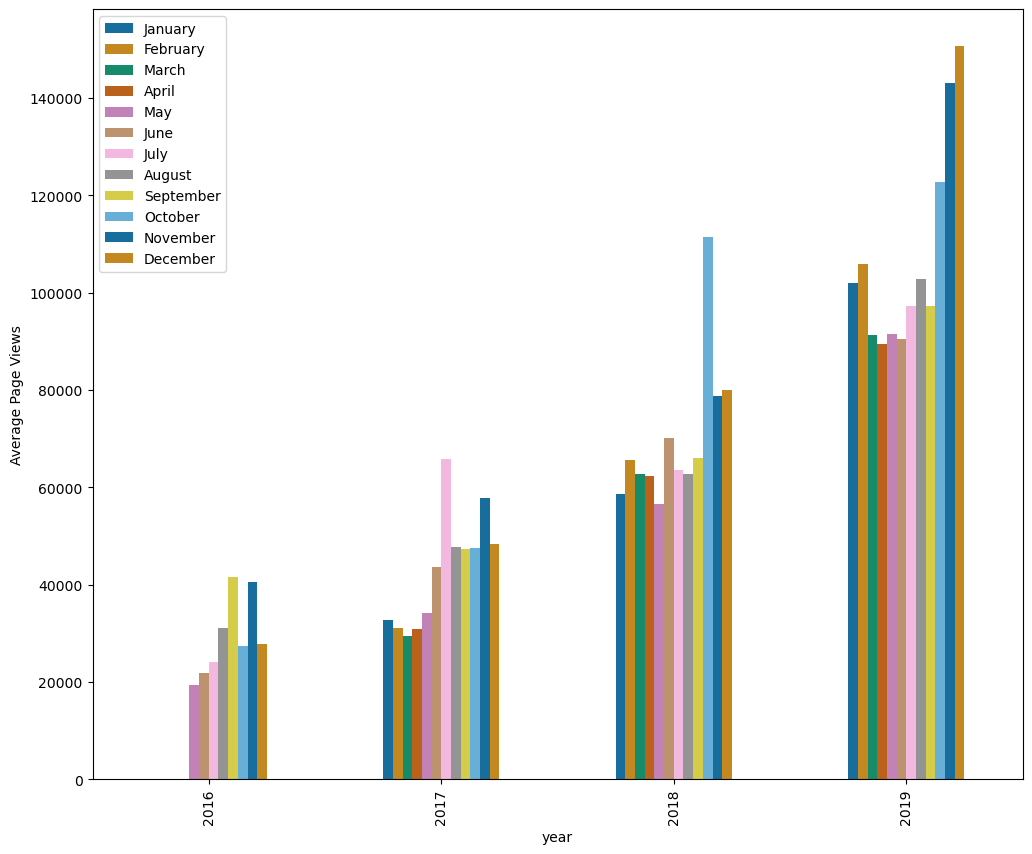

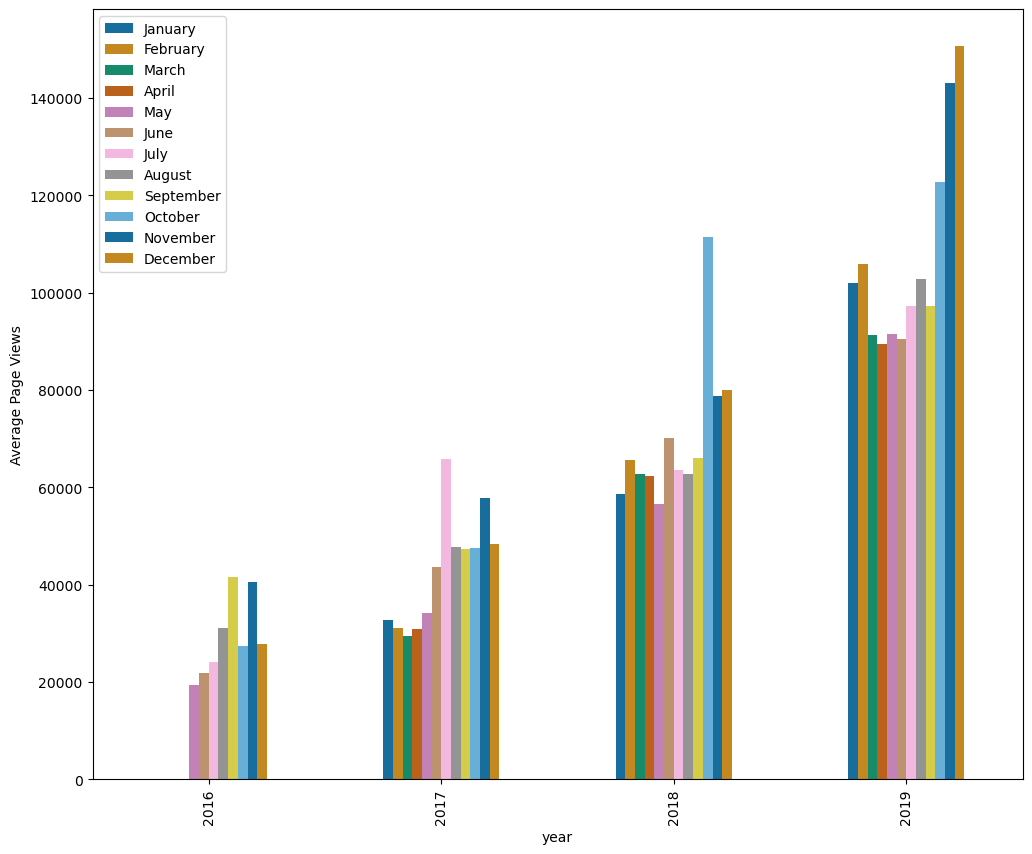

In [8]:
draw_bar_plot()

#### NOW CREATE THE BOX PLOT

In [9]:

def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['date'] = pd.to_datetime(df_box['date'])
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.month
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    # Order of months
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Draw box plots (using Seaborn)
        # Create a 1x2 grid of subplots with shared y-axis
    fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)
    
    #Box Plot 1 - Plot Page Views Per Year
    sns.boxplot(x="year", y="value", data=df_box, ax=axes[0], linewidth=.5, fliersize=2)
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_ylabel("Page Views")
    axes[0].set_xlabel("Year")
    
    #Box Plot 2 - Plot Page Views Per Month
    # Box Plot 2: Plot value per month
    sns.boxplot(x="month", y="value", data=df_box, ax=axes[1], order=month_order,linewidth=.5, fliersize=2)
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_ylabel("Page Views")
    axes[1].set_xlabel("Month")
    #Modify the x-labels to be 3 chars
    axes[1].set_xticklabels([label.get_text()[:3] for label in axes[1].get_xticklabels()])

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig



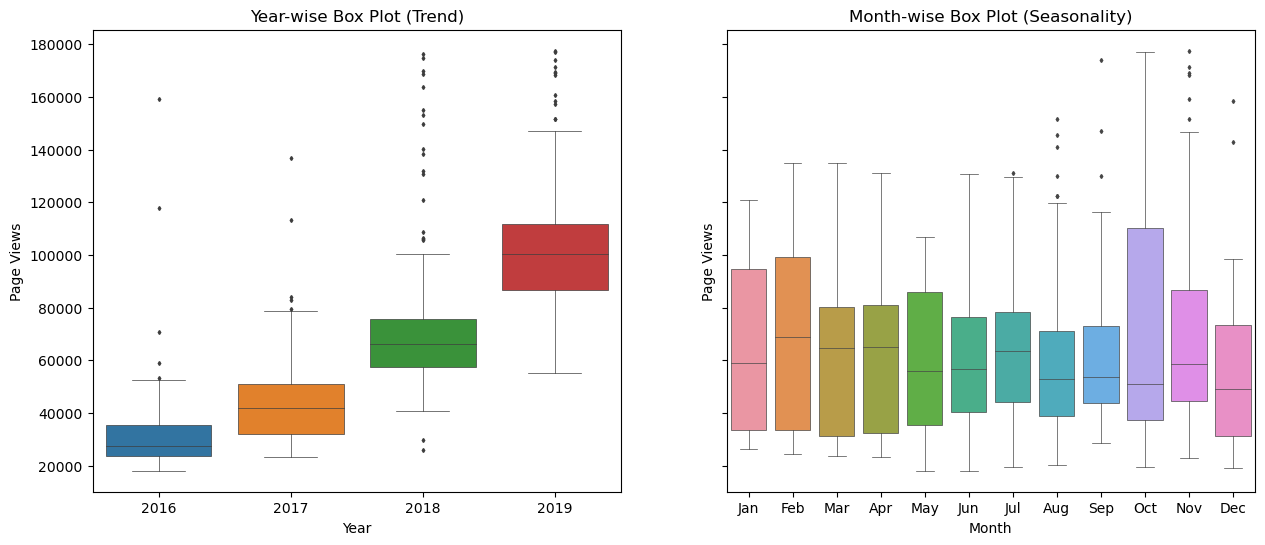

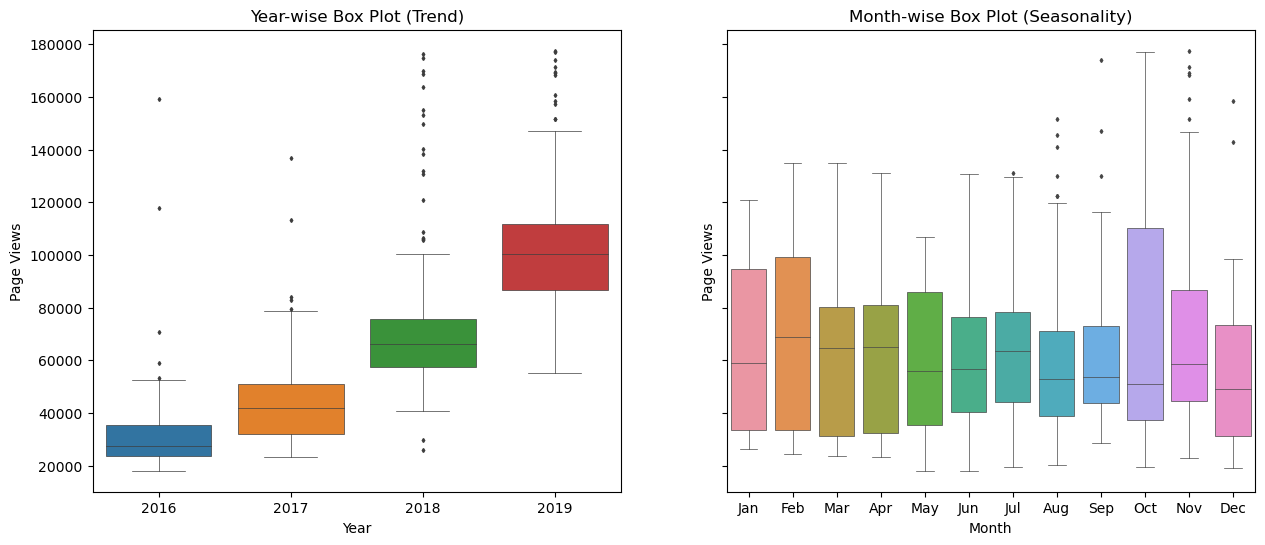

In [10]:
draw_box_plot()